# 5. Boosting algortihms (Theory)

This notebook will resume theorical concepts about boosting algorithms and it will show some useful plots and graphs for an easily understanding.

### Index:
1. [Introduction](#1.-Introduction)
2. [AdaBoost](#2.-AdaBoost)
3. [Gradient Boosting](#3.-Gradient-Boosting)
4. [XGBoost](#4.-XGBoost)
5. [LightGBM](#5.-LightGBM)
6. [CatBoost](#6.-CatBoost)

# 1. Introduction

Boosting algorithms were created in 1997 with the emergence of AdaBoost (by Freund & Schapire). They work building some weak learners (simple models) and ensembling them, creating a complex model. Also, these weak learners, in our case decision trees, are built sequentially; so, every decision tree (except the first) is allowed to correct the errors made by the last one. It's possible taking into account the weight of each sample and modifying it in each step.

There are some boosting algorithms and some versions of each one. We will study: AdaBoost, Gradient Boosting, XGBoost, LightGBM and CatBoost.

We also show some examples. That's the reason why we will need these python packages:

In [3]:
#We load packages required:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. AdaBoost

#### 2.1 Theory

AdaBoost was the first boosting algorithm created. It uses stumps as a weak learners, i.e., decision trees with only two leaf nodes. These weak learners are very imprecise, but the combination of them and the way of building them results in a very attractive method.

The AdaBoot algorithm we will analyze is:

<img src=https://i.stack.imgur.com/ljZmk.jpg>

Firstly, we assign the same weight for all samples, because we haven't done any prediction yet. So:

\begin{equation}
w_i = 1/N \, \, \, \forall i \in \{ 1, 2, \dots, N \}
\end{equation}

Then, we fit our stump ($G_m(x)$) using the weighted training data (if m = 1, we fit it like always), and we calculate the error made by the stump with:

\begin{equation}
err_m = \frac{\sum_{i=1}^{N} w_i I(y_i \neq G_m(x_i))}{\sum_{i=1}^{N} w_i}
\end{equation}

In this expression we have the sum of weights from incorrect classified values divided by the sum of total weights. The denominator is necessary in the expression because we can find a case where $\sum_{i=1}^{N} w_i \neq 1$ due to posterior modifications. So, if we define $err_m$ as we say, we can be sure of: $err_m \in [0, 1]$.

Note that in first step ( m = 1 ):

\begin{equation}
err_1 = \frac{\sum_{i=1}^{N} w_i I(y_i \neq G_1(x_i))}{\sum_{i=1}^{N} w_i} = \frac{\frac{1}{N} \sum_{i=1}^{N}I(y_i \neq G_1(x_i))}{1} = \frac{num\_of\_errors}{N}
\end{equation}

Now, in 3c, we can observe that we have to define:

\begin{equation}
\alpha_m = \log \left( \frac{1 - err_m}{err_m} \right)
\end{equation}

This value is also called: 'Amount of Say' for the stump. Let's plot this function to get conclusions:

<ipython-input-3-068c4c148198>:6: RuntimeWarning: divide by zero encountered in true_divide
  alpha = lambda x: np.log((1- x)/x)
<ipython-input-3-068c4c148198>:6: RuntimeWarning: divide by zero encountered in log
  alpha = lambda x: np.log((1- x)/x)


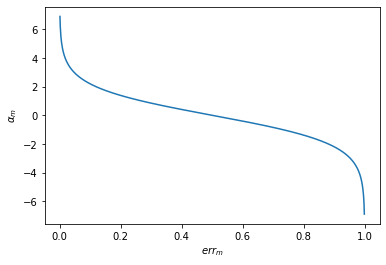

In [3]:
#We define our function:
alpha = lambda x: np.log((1- x)/x)

#We plot it:
x = np.linspace(0, 1, 1000)

plt.plot(x, alpha(x))
plt.xlabel(r'$err_m$')
plt.ylabel(r'$\alpha_m$')
plt.show()



As we can see, a good classification job ($err_m \simeq 0$) implies high $\alpha_m$ values. On the other hand, a poor classification job implies high negative values of $\alpha_m$.

Ending with the loop, we only have to reassign weights to training observations. The process to do it is defining:
\begin{equation*}
w_i^{m+1} =
\left\{
\begin{array}{crl}
w_i^m & si & y_i = G_m(x_i) \\
w_i^m e^{\alpha_m} & si & y_i \neq G_m(x_i) \\
\end{array}
\right.
\end{equation*}
where $w_i^m$ is the weight of the observation i in the iteration m.

With this reassignment we obtain an increasement of weights of misclassified observations.

Before starting with the last step, we have to emphasize the way of building stumps. Where m = 1, we use the Gini index as a impurity function:
\begin{equation*}
G_{region} = \sum_{k=1}^K p_{rk}(1 - p_{rk}) = 1 - \sum_{k=1}^K p_{rk}^2
\end{equation*}
where $p_{rk}$ is the proportion of training observations from class k that are in region r; and K is the total number of classes. In the same way, each node determines two regions; so we can define:
\begin{equation*}
G_{node} = \frac{n_1}{n_1 + n_2}G_1 + \frac{n_2}{n_1 + n_2}G_2
\end{equation*}
where $n_1$ and $n_2$ are the number of observations in each region, respectively. That allows us to determinate which is the region that minimizes Gini index and to choose the correct variable and the value that make this regions.

Nevertheless, this Gini index is only correct where all observations have the same weight. So, where m > 1, we need to define a weighted Gini index.

#### 2.2 Example step by step

To end with AdaBoost algorithm, we will show, step by step, which is the process with an example. We will use the dataset 'Rain in Australia' like in the other notebooks but choosing only the 5 first observations and the variables: 'Humidity3pm' and 'Cloud3pm'.

In [10]:
#We load data:
weather = pd.read_parquet('../data/04_model_input/master.parquet')

#We choose the variables and observations we are interested in:
observations = [0, 1, 2, 3, 4]
model_columns = ['Humidity3pm', 'Cloud3pm']

#We put it in train variable and solve Nan problems
train = weather.loc[observations, model_columns].fillna(-1)

#We show it:
train

,Humidity3pm,Cloud3pm
0,22.0,-1.0
1,25.0,-1.0
2,30.0,2.0
3,16.0,-1.0
4,33.0,8.0


# 3. Gradient Boosting

# 4. XGBoost

# 5. LightGBM

# 6. CatBoost